In [27]:
from nilmtk import DataSet
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import datetime
import warnings
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot

import itertools as it


from utils import print_parameters, print_log
from utils import create_file, create_hdf5_group, store_single_hdf5, store_many_hdf5, read_many_hdf5
from utils import get_appliances, get_good_sections, get_clean_data, trasfrom_ts, append_images

plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,30))

dataset_name = "iawe"
dataset = DataSet('datasets/'+dataset_name+'.h5')

<Figure size 720x2160 with 0 Axes>

# TIMESERIES TO IMAGE 


In [150]:
# for meter in dataset.buildings[1].elec.submeters().meters:
meter = dataset.buildings[1].elec.submeters().meters[7]
print(meter.appliances[0].metadata.get("type"),meter.on_power_threshold())
df = next(meter.load(physical_quantity='power'))
#df = df.fillna(0)
#df = df.resample("6s").bfill(limit=1)
#df = df.resample("6s").bfill()

rule = '6s'
f = df.index.floor(rule)
df = df.groupby(f).bfill(limit=1)


timestamps = df.index.view(np.int64)//10**9

# break
#for index, row in itertools.islice(df.iterrows(), 5):

print(df.power.active[200:600])



television 10
2013-06-12 11:59:49+05:30    75.967003
2013-06-12 11:59:50+05:30    75.813004
2013-06-12 11:59:51+05:30    76.282997
2013-06-12 11:59:52+05:30    76.078003
2013-06-12 11:59:53+05:30    75.801003
                               ...    
2013-06-12 12:06:26+05:30    74.528999
2013-06-12 12:06:27+05:30    74.568001
2013-06-12 12:06:28+05:30    74.521004
2013-06-12 12:06:29+05:30    74.559998
2013-06-12 12:06:30+05:30    74.757004
Name: active, Length: 400, dtype: float32


In [373]:
def mount_data(meter):
    #read power data and write it to timeseries 

    df = next(meter.load(physical_quantity='power'))

    #resample and leave out zeros 
    #f = df.index.floor("6s")
    #df = df.groupby(f).mean()

    df = df.resample('6s').fillna("backfill",limit=1)

    #df = df.resample("6s").bfill(limit=1)

    tstamps = df.index.view(np.int64)//10**9

    try:
        ts = df.power.active.values.transpose()
    except:
        print("no active power!")
        print_log("no active power!")
        
        try:
            print("using apparent power!")
            print_log("using apparent power!")
        
            ts = df.fillna(0).power.apparent.values.transpose()
        
        except:
            print("no apparent power!")
            print_log("no apparent power!")
            
            raise ValueError
    
    return ts, tstamps

    
def clean_data(t_series,t_stamp):
    t_series_out = np.zeros([0,t_series.shape[1]])
    t_stamp_out = np.zeros([0,t_stamp.shape[1]])


    for t,pwr in zip(t_stamp,t_series):
        diff = np.diff(t)

        for i,di in enumerate(diff):
            if di < 60*5:
                
                diff[i] = 6
               

        # append if high entropy
        if (np.all(diff == diff[0]) and np.any( pwr > 10 )):
            
                pwr = pwr[np.newaxis,...]
                t_series_out = np.append(t_series_out, pwr, axis=0)

                t = t[np.newaxis,...]
                t_stamp_out = np.append(t_stamp_out, t, axis=0)
         
    return t_series_out, t_stamp_out


def moving_window(x, length, step=1):
    streams = it.tee(x, length)
    return zip(*[it.islice(stream, i, None, step*length) for stream, i in zip(streams, it.count(step=step))])
     
def remove_empty(tslices,tstamps):

    return zip(*[(pd.Series(ts).fillna(0).tolist(),tsp) for ts,tsp in zip(tslices,tstamps) if (np.count_nonzero(~np.isnan(ts))/np.count_nonzero(ts)) > 0.85 ])


#try to use pandas array 

# def fill_nans(tslices):

#     return [(ts) for slice in tslices for sample in slice if sample ]

# # dataset.set_window()

# # count =[0,0,0,0,0,0]
# differ = []
# for meter in  
meter = dataset.buildings[1].elec.submeters().meters[6]
print(meter.appliances[0].metadata.get("type"),meter.on_power_threshold())

ts,tstamps = mount_data(meter)

tstamps = np.asarray(list(moving_window(tstamps, 130)))
ts = np.asarray(list(moving_window(ts, 130)))

#count =[0,0,0,0,0,0]
ts,tstamps = clean_data(ts,tstamps)
print(ts.shape,tstamps.shape)

try:
    ts,tstamps = remove_empty(ts,tstamps)
except:
    print("array empty!")

ts= np.asarray(list(ts))
tstamps = np.asarray(list(tstamps))

print(ts.shape)

# print("percent high d",100*count[2]/count[1])

# print("percent lost due to jump ",100*count[4]/count[0])
# print("percent lost due to enropy ",100*count[3]/count[0])

unknown 10
(7, 130) (7, 130)
array empty!
(7, 130)


In [367]:
list(zip(*[[1],[2,3,4]]))

[(1, 2)]

In [352]:
if list([1]):
    print("ok")

ok


television


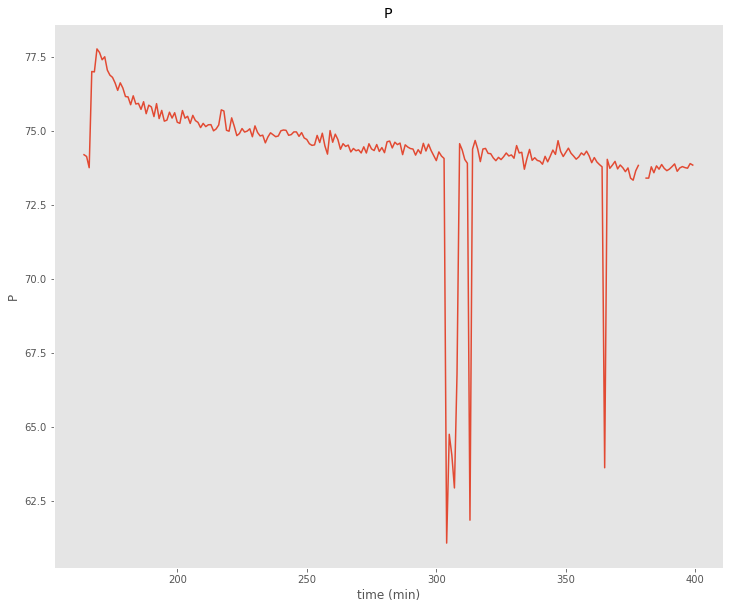

In [80]:
 #df = df.power.active #for iawe
dataset.set_window
meter = dataset.buildings[1].elec.submeters().meters[7]
print(meter.appliances[0].metadata.get("type"))
ts,tstamps = mount_data(meter)

#     print(meter.appliances[0].metadata.get("type"),meter.on
fig, ax = plt.subplots()
#df.power.active
ax.plot(ts[200:600])

ax.set(xlabel='time (min)', ylabel='P', title='P')
ax.grid()

In [26]:
ts[0:500]

array([74.642, 74.667, 73.451, 77.045, 77.439, 55.865, 78.734, 78.761,
       74.219, 77.552, 77.39 , 77.012, 77.121, 76.951, 76.809, 76.862,
       76.584, 76.471, 76.556, 76.518, 76.286, 76.285, 76.508, 76.318,
       76.004, 76.03 , 76.045, 76.159, 75.865, 75.888, 75.961, 75.766,
       75.89 , 75.805, 71.394, 75.862, 75.849, 75.447, 73.113, 75.877,
       75.845, 75.882, 75.661, 75.627, 75.642, 75.767, 75.551, 75.725,
       75.713, 75.789, 75.566, 75.49 , 75.841, 75.498, 75.507, 75.47 ,
       75.503, 75.177, 75.494, 75.36 , 75.468, 75.186, 75.313, 75.237,
       75.286, 75.373, 75.351, 75.3  , 75.385, 74.98 , 75.18 , 75.055,
       75.263, 75.303, 75.28 , 75.047, 75.073, 74.957, 74.909, 75.093,
       75.084, 75.276, 75.356, 75.026, 74.845, 74.957, 74.864, 75.013,
       74.929, 74.939, 74.81 , 74.898, 74.919, 74.852, 74.865, 74.585,
       74.904, 74.882, 74.871, 74.875, 74.817, 74.757, 74.942, 74.711,
       74.807, 74.869, 74.835, 74.688, 74.682, 74.824, 74.79 , 74.617,
      

In [65]:
c, b = np.unique(a,return_counts=True)

In [66]:
c[:15]

array([ 60,  66,  72,  78,  84,  90,  96, 102, 108, 114, 120, 126, 132,
       138, 144])

In [67]:
b

array([39, 31, 32, 22, 33, 21, 19, 15, 15, 11,  8, 12, 11,  9,  9,  8,  7,
        3,  8, 11, 12, 22, 42, 33, 18, 11, 23,  9,  5, 11,  4,  5,  2,  1,
        6,  6,  1,  3,  2,  2,  3,  6,  1,  5,  2,  5,  2,  5,  1,  2,  2,
        1,  1,  2,  1,  2,  2,  3,  1,  2,  1,  1,  2,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  4,  2,  1,  1,  2,  2,  2,  1,  1,  1,  2,  2,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  3,  1,  3,  2,  1,  2,  1,  1,
        2,  3,  2,  1,  1,  2,  1,  2,  2,  2,  4,  2,  1,  1,  2,  1,  1,
        1,  1,  4,  1,  3,  1,  1,  1,  1,  1,  2,  4,  1,  1,  1,  1,  1,
        3,  2,  2,  1,  3,  1,  2,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  4,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  2,  1,  2,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  1

<BarContainer object of 20 artists>

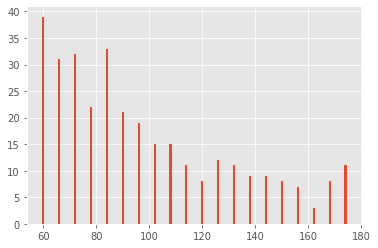

In [69]:
plt.bar(c[0:20],height=b[:20])

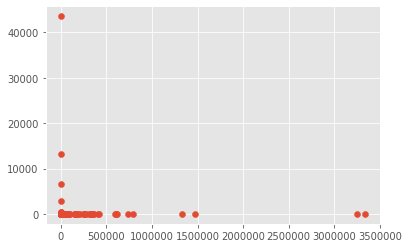

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


#plt.hist(np.array(differ), density=False, bins=5)  # density=False would make counts
dd

In [374]:
# reset window size to full size
# 
dataset.set_window()

#--PARAMTERS--#   
#-step
par = {}
par["step_in_mins"]= 13 
#-image
par["max_images"] = 1000 #max number of images per appliance per buidling 
par["img_size"] = 100 # means img_size x img_size (igored when using RECC)
par["frames"] = 5 #change to 0 for images or set more for video  
par["allowed_delta_between_images"] = 6*2*100 #allowed missing seconds between images in video (6 seconds is mimimum)

#-samples
par["sample_period"] = 6 # can be obtained from dataset.metadata["sample_period"] but it is inconsistent
par["percentage_of_missing_data_allowed"] = 0.95 # is necessary since sampling rate is inconsistent or samples are missing 

#-brightness
par["add_brightness"] = True

#-timeseries
par["ts_save"] = False # save soruce time-series 

#-trans type
par["trs_type"] = "GAF" #GAF or RECU - Gramian Angural Field or Recurrance plot

#-if trans type GAF 
par["trs_type_gaf"] = "GASF" # GASF or GADF

#-buildings
par["multiple_buildings"] = True # multiple buildings 
par["selected_building"] = 1 # is used in case parameter multiple buidlings is False

#-appliances
par["manauly_select_appliances"] = False


par["di"] = 0
par["i"] = 0
 #-------------------------------------------------------------------------------------------------------------------------------


def param_setup(dataset,par):

    #get params from metadata 
    par["dataset_name"] = dataset.metadata["name"].lower()
    par["n_buildings"] = len(dataset.buildings)

    #calculate
    par["ts_size"] = round(par["step_in_mins"]*60/par["sample_period"]) # calculate estimate size of ts

    #fix parms 
    #RECU already includes brightness 
    if par["trs_type"] == "RECU": par["add_brightness"] = False

    if par["multiple_buildings"]: par["selected_building"] = "A"
        
    #handle edge case for RECU
    par["org_img_size"] = par["img_size"]

    if par["trs_type"] == "RECU": par["img_size"] = par["ts_size"] 
    
    

param_setup(dataset,par)

get_appliances(dataset,par)

print_parameters(par)

file_name = create_file(par)

# define global metrics
healthy_appliances = set()
all_images_stacked = 0
images_stacked = 0


# collect at least N images of "max_dataset_size" for each applaiance for every building. #TODO 
for appliance in par["appliances"]:
    print_log(par,"\n")
    print_log(par," Starting " f"{appliance} ("+str(par["appliances"].index(appliance)+1)+"/"+str(len(par["appliances"]))+"):")
    print("\n")
    print(" Starting " f"{appliance} ("+str(par["appliances"].index(appliance)+1)+"/"+str(len(par["appliances"]))+"):")
    
    #define / reset metric
    images_stacked = 0
    
    #loop through all buildings 
    for building in dataset.buildings:
        
        if par["frames"] == 0:
            #define array that will store one image
            img_stack = np.zeros([0, par["img_size"], par["img_size"]])
            ts_stack= np.zeros([0, par["ts_size"]])
            
            #define tmp array to temporary image / frame 
            img_stack_tmp = 0
            ts_stack_tmp = 0

        else:
            #define tmp array to temporary image / frame 
            img_stack_tmp = np.zeros([0, par["img_size"], par["img_size"]])
            ts_stack_tmp = np.zeros([0, par["ts_size"]])
            
            #define main array to store video
            img_stack = np.zeros([0, par["frames"], par["img_size"], par["img_size"]])
            ts_stack = np.zeros([0, par["frames"], par["ts_size"]])
    

        # case if using only selected building
        if par["multiple_buildings"] == False:
                if int(building)  != par["selected_building"]:
                    print("skipping building "f"{building}"" due to parameter muliple_buildings ")
                    continue
        
        #filter out appliances with appliance
        for meter in dataset.buildings[building].elec.submeters().meters:  
            
            # get name and instance of an appliance from metadata
            label = meter.appliances[0].metadata.get("type")
            
            #continue only for applaiance from first loop
            if label != appliance : continue 
           
            data,tstamps = mount_data(meter) 

            tstamps_sliced = np.asarray(list(moving_window(tstamps, par["ts_size"])))
            data_sliced = np.asarray(list(moving_window(data, par["ts_size"])))

            
            data_sliced, tstamps_sliced = clean_data(data_sliced, tstamps_sliced)

            try:
                data_sliced, tstamps_sliced = remove_empty(data_sliced, tstamps_sliced)
            except:
                print("error while removing, array is probably empty!")
                continue
        
            data_sliced= np.asarray(list(data_sliced))
            tstamps_sliced = np.asarray(list(tstamps_sliced))
            #if no data 
            if data_sliced.shape[0] == 0: continue
        
            last_time = 0
            
            for i,[data,tstamps] in enumerate(zip(data_sliced,tstamps_sliced)):
                #trasform clean ts
                print("\r",
                        " data procesed: ", round(100*i/(data_sliced.shape[0]),2), "% ",
                        " finished: ", round(100*((img_stack.shape[0])/par["max_images"]),2), "% | ",
                        " building ", building, " | ",
                        end="")

                #check if dataset size is larger than specified then set break flag to break out of two loops
                if img_stack.shape[0] >= (par["max_images"]):
                    print("max size of "f"{par['max_images']}"" reached, skipping!")   
                    print_log(par,"max size of "f"{par['max_images']}"" reached, skipping! dataset size: ", img_stack.shape[0])
                    break

                try:
                    #return empty if no data 
                    img,ts_pad = trasfrom_ts(data,par)
                    
                except:
                    print("error while transforming")
                    continue

                
                time = tstamps[0]
                
                #append trasformed ts
                img_stack, img_stack_tmp, ts_stack, ts_stack_tmp = append_images(
                                                                                img,
                                                                                img_stack,
                                                                                img_stack_tmp,
                                                                                ts_pad,
                                                                                ts_stack,
                                                                                ts_stack_tmp,
                                                                                time,
                                                                                last_time,
                                                                                par
                                                                                )
                
                last_time = tstamps[-1]
               
        #save images to hdf5
        group_path = f"{par['dataset_name']}""/"f"{appliance}""/"f"{building}"""
        
        if img_stack.shape[0] > 0:

            store_many_hdf5(file_name,img_stack[...,np.newaxis], group_path, "img", force_del="yes")
            
            images_stacked += img_stack.shape[0]
            all_images_stacked += img_stack.shape[0]
            healthy_appliances.add(appliance)
            
            #save source time series 
            if par["ts_save"]:
                store_many_hdf5(file_name,ts_stack,group_path, "ts", force_del="yes")

        else:
            print("empty for building", building,"appliance", appliance)
  
        print("finished building N", building)
        print_log(par,"finished building N", building)

    print_log(par,"")
    print_log(par,"number of images (per appliance) stacked: "f"{images_stacked}")
    print("")
    print("number of images (per appliance) stacked: "f"{images_stacked}")

    print_log(par,"finished "f"{appliance}")
    print("finished "f"{appliance}")
    
    print("\n")
    print_log(par,"\n")


print_log(par,"num of images stored: ", all_images_stacked)
print("num of images stored: ", all_images_stacked)
print_log(par,"appliances stored: ", healthy_appliances)
print("appliances stored: ", healthy_appliances)

file exists!


 Starting fridge (1/9):
  data procesed:  99.98 %   finished:  77.2 % |   building  1  |   removed img!  27.8 % |   building  1  |  42.58 %   finished:  32.6 % |   building  1  |  data procesed:  45.27 %   finished:  34.8 % |   building  1  |  data procesed:  51.2 %   finished:  39.3 % |   building  1  | 
storing... samples to store: 772
finshed. stored to iawe_GASF_13m_100S5X_9A1000N_AB_BRIG/iawe/fridge/1/img
finished building N 1

number of images (per appliance) stacked: 772
finished fridge




 Starting computer (2/9):
  data procesed:  99.97 %   finished:  40.0 % |   building  1  | 77.15 %   finished:  32.2 % |   building  1  |   removed img!
storing... samples to store: 401
finshed. stored to iawe_GASF_13m_100S5X_9A1000N_AB_BRIG/iawe/computer/1/img
finished building N 1

number of images (per appliance) stacked: 401
finished computer




 Starting wet appliance (3/9):
  data procesed:  99.57 %   finished:  0.1 % |   building  1  |   removed img!
storing... samples 

# DEBUG AREA

In [4]:
def append_images(img,img_stack, img_stack_tmp, ts_pad, ts_stack, ts_stack_tmp, interval, last_interval, par):
    """
    Appends images and ts 

    :param img: timeseries images numpy array
    :param img_stack: stack of past images numpy array
    :param img_stack_tmp: stack of temp images for n_dim images numpy array

    :param ts_pad: padded timeseries numpy array
    :param ts_stack: stack of past timeseries numpy array
    :param ts_stack_tmp: stack of temp images for n_dim images numpy array

    :param interval: current intreval int
    :param last_interval: for tracking diff between images int
    :param par: dictionary of user defined parameters 

    :return: None
    """
    
    #part where we save converted images
    if len(img_stack.shape) == 4:
        #append as multi dimensonal images 

        if img_stack_tmp.shape[0] < par["frames"]:
            #images in multi dim array must be in strict series order

            #check if first image
            if img_stack_tmp.shape[0] != 0:
                delta_interval = interval - last_interval 

            else:
                delta_interval = 0
            
            #check if delta_interval smaller than wanted
            if delta_interval <= par["allowed_delta_between_images"]: 
                #append, images are strictly in series
                img_stack_tmp = np.append(img_stack_tmp, img, axis=0)
                ts_stack_tmp = np.append(ts_stack_tmp, ts_pad, axis=0)

            else:
                #reset stack to 0
                ts_stack_tmp = np.zeros([0, par["ts_size"]])
                img_stack_tmp = np.zeros([0, par["img_size"], par["img_size"]])

        else:
            #full   
            img_stack_tmp = img_stack_tmp[np.newaxis, ...] #add new axis for compatability
            img_stack = np.append(img_stack, img_stack_tmp, axis=0)
            
            ts_stack_tmp = ts_stack_tmp[np.newaxis, ...] #add new axis for compatability
            ts_stack = np.append(ts_stack, ts_stack_tmp, axis=0)

            #reset stack to 0
            ts_stack_tmp = np.zeros([0, par["ts_size"]])
            img_stack_tmp = np.zeros([0, par["img_size"], par["img_size"]])

    else:
        #append as ordinary images
        img_stack = np.append(img_stack, img, axis=0)
        ts_stack = np.append(ts_stack, ts_pad, axis=0)

    return img_stack, img_stack_tmp, ts_stack, ts_stack_tmp

In [20]:
def check_if_images_in_series():

SyntaxError: invalid syntax (<ipython-input-20-72e43758b484>, line 1)

In [198]:
a = [1,2,3]
b = [3,4,5]

for i,[c,d] in enumerate(zip(a,b)):
    print(c,d)

1 3
2 4
3 5


In [ ]:
## nofdatest to number of samples
#3 if stavek start end 
# komentiraj arbitrarne odločitve 
# assert poglej!!
#  cooment                   #check if dataset size is larger than specified

In [5]:
dataset.metadata

{'meter_devices': {'current_cost': {'max_sample_period': 300,
   'measurements': [{'type': 'active',
     'upper_limit': 5000,
     'lower_limit': 0,
     'physical_quantity': 'power'}],
   'description': None,
   'sample_period': 6},
  'EM6400': {'max_sample_period': 300,
   'description': 'Multifunction meter for feeders',
   'manufacturer_url': 'http://www.schneider-electric.com/',
   'model': 'EM6400',
   'measurements': [{'type': 'active',
     'upper_limit': 10000,
     'lower_limit': 0,
     'physical_quantity': 'power'},
    {'type': 'apparent',
     'upper_limit': 10000,
     'lower_limit': 0,
     'physical_quantity': 'power'},
    {'type': 'reactive',
     'upper_limit': 10000,
     'lower_limit': 0,
     'physical_quantity': 'power'},
    {'type': 'apparent',
     'upper_limit': 70,
     'lower_limit': 0,
     'physical_quantity': 'frequency'},
    {'type': 'apparent',
     'upper_limit': 270,
     'lower_limit': 0,
     'physical_quantity': 'voltage'},
    {'type': None,
 

In [16]:
print(org_img_size)

NameError: name 'org_img_size' is not defined

In [13]:
#counters represent data as it goes through generator
print("REPORT FOR: ",appliances)
all0 = counter_data + counter_nodata
print("data lost due not being able to read the data")
print("all",all0)
print("reading failed",counter_nodata)
print("read",counter_data)

print("---------")
all1 = counter_empty + counter_halfull + counter_full
print("data lost due to missing data")
print("all",all1)
print("empty",counter_empty, "avg data %",round(100*(counter_empty/all1),2))
print("half full",counter_halfull, "avg data %",round(100*(counter_halfull/all1),2) )
print("full",counter_full,"%",round(100*(counter_full/all1),2))

print("---------")
all3 = counter_entropy+counter_noentropy
print("data lost because it has low entropy or is lower than 10W")
print("all entrop",all3," % of input",round(100*all3/all1,2))
print("high entrop",counter_entropy,"%",round(100*(counter_entropy/all3),2))
print("low entrop",counter_noentropy,"%",round(100*(counter_noentropy/all3),2))

print("---------")
all2 = counter_deltatohigh + counter_gooddelta
print("datalost when stacking")
print("all delta",all2," % of input",round(100*all2/all1,2))
print("good delta",counter_gooddelta,"%",round(100*(counter_gooddelta/all2),2))
print("not good delta",counter_deltatohigh,"%",round(100*(counter_deltatohigh/all2),2))
print("---------")
print("")
print("alll images used",5*all_images_stacked," stacked",all_images_stacked)
print("output %",5*100*all_images_stacked/all1)

REPORT FOR:  ['fridge', 'television', 'clothes iron', 'washing machine', 'computer', 'air conditioner']
data lost due not being able to read the data
all 13128
reading failed 0
read 13128
---------
data lost due to missing data
all 13128
empty 1275 avg data % 9.71
half full 113 avg data % 0.86
full 11740 % 89.43
---------
data lost because it has low entropy or is lower than 10W
all entrop 11740  % of input 89.43
high entrop 9788 % 83.37
low entrop 1952 % 16.63
---------
datalost when stacking
all delta 8298  % of input 63.21
good delta 7946 % 95.76
not good delta 352 % 4.24
---------

alll images used 7450  stacked 1490
output % 56.74893357708714


In [ ]:
#(debug)graph first portion of the seleted range
# n = 18
# ukdale.set_window(start=date_range[n],end=date_range[n+1])
# elec = ukdale.buildings[1].elec
# fridge = elec['fridge']
# fridge.available_columns()
# df = next(fridge.load(physical_quantity='power'))
# print(len(df))
# fig, ax = plt.subplots()
# ax.plot(df)
# ax.set(xlabel='time (min)', ylabel='P', title='P')
# ax.grid()

In [20]:
ts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

HTPC 1


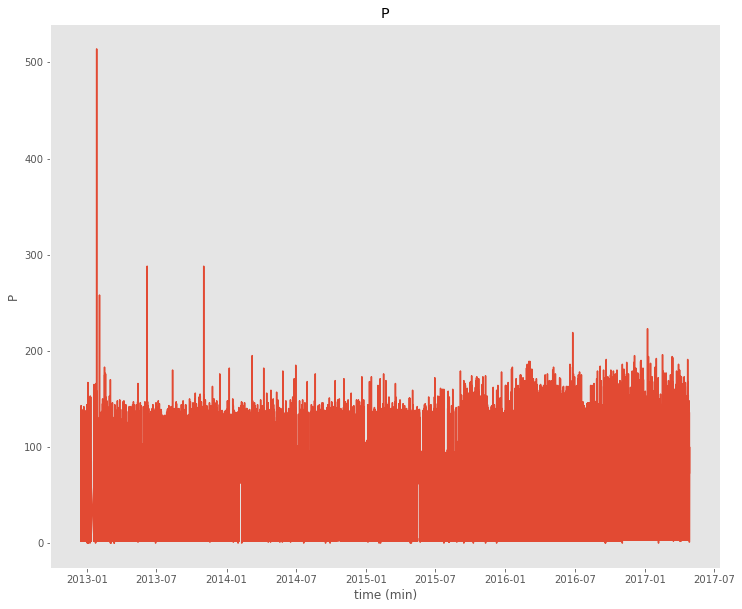

In [22]:
meter = dataset.buildings[1].elec.submeters().meters[7]
dataset.set_window()
df = next(meter.load(physical_quantity='power'))

appliance_metadata = meter.appliances[0].metadata
label = appliance_metadata.get("type")
instance = appliance_metadata.get("instance")
print(label,instance)

#df = df.power.active #for iawe
fig, ax = plt.subplots()
ax.plot(df.fillna(0))
 
ax.set(xlabel='time (min)', ylabel='P', title='P')
ax.grid()

elec = dataset.buildings[2].elec#df.power.active[1900:1950]

In [23]:
ts = df.fillna(0).power.active.values.transpose()

In [25]:
len(ts)

19543268

In [26]:
more = ts[ts > 100]
print(len(more))
print(len(ts))
print("%",100*len(more)/len(ts))

5876
19543268
% 0.030066619359669016


In [182]:
dataset.set_window()
#fridge
meter = dataset.buildings[2].elec.submeters().meters[1]
df = next(meter.load(physical_quantity='power'))

In [8]:
for building in dataset.buildings:
#building = 
        print("------",building)
        count = 0
        for meter in dataset.buildings[building].elec.submeters().meters:
                count += 1
                # get name and instance of an appliance from metadata
                appliance_metadata = meter.appliances[0].metadata
                label = appliance_metadata.get("type")
                instance = appliance_metadata.get("instance")
                print(label,instance,count)
                

------ 1
boiler 1 1
solar thermal pumping station 1 2
laptop computer 1 3
washer dryer 1 4
dish washer 1 5
television 1 6
light 1 7
HTPC 1 8
kettle 1 9
toaster 1 10
fridge freezer 1 11
microwave 1 12
computer monitor 1 13
audio system 1 14
breadmaker 1 15
audio amplifier 1 16
broadband router 1 17
light 3 18
soldering iron 1 19
ethernet switch 1 20
vacuum cleaner 1 21
light 4 22
light 5 23
light 16 24
light 6 25
tablet computer charger 1 26
active subwoofer 1 27
light 7 28
radio 1 29
light 8 30
wireless phone charger 1 31
light 9 32
mobile phone charger 1 33
light 10 34
coffee maker 1 35
radio 2 36
mobile phone charger 2 37
hair dryer 1 38
hair straighteners 1 39
clothes iron 1 40
oven 1 41
computer 1 42
light 11 43
light 12 44
baby monitor 1 45
charger 1 46
light 13 47
light 14 48
light 15 49
desktop computer 1 50
fan 1 51
printer 1 52
------ 2
laptop computer 1 1
computer monitor 1 2
active speaker 1 3
computer 1 4
broadband router 1 5
external hard disk 1 6
kettle 1 7
rice cooker 1 

In [11]:
#for n in range(len(dataset.buildings[building].elec.submeters().meters)):

meter = dataset.buildings[1].elec.submeters().meters[7]
    
# get name and instance of an appliance from metadata
appliance_metadata = meter.appliances[0].metadata
label = appliance_metadata.get("type")
instance = appliance_metadata.get("instance")
print(label,instance)

HTPC 1
